# Goal
In this chapter,
We will see the basics of ORB

# Theory

As an OpenCV enthusiast, the most important thing about the ORB is that it came from “OpenCV Labs”. This algorithm was brought up by Ethan Rublee, Vincent Rabaud, Kurt Konolige and Gary R. Bradski in their paper ORB: An efficient alternative to SIFT or SURF in 2011. As the title says, it is a good alternative to SIFT and SURF in computation cost, matching performance and mainly the patents. Yes, SIFT and SURF are patented and you are supposed to pay them for its use. But ORB is not !!!

ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features. But one problem is that, FAST doesn’t compute the orientation. So what about rotation invariance? Authors came up with following modification.

It computes the intensity weighted centroid of the patch with located corner at center. The direction of the vector from this corner point to centroid gives the orientation. To improve the rotation invariance, moments are computed with x and y which should be in a circular region of radius r, where r is the size of the patch.

Now for descriptors, ORB use BRIEF descriptors. But we have already seen that BRIEF performs poorly with rotation. So what ORB does is to “steer” BRIEF according to the orientation of keypoints. For any feature set of n binary tests at location (x_i, y_i), define a 2 \times n matrix, S which contains the coordinates of these pixels. Then using the orientation of patch, \theta, its rotation matrix is found and rotates the S to get steered(rotated) version S_\theta.

ORB discretize the angle to increments of 2 \pi /30 (12 degrees), and construct a lookup table of precomputed BRIEF patterns. As long as the keypoint orientation \theta is consistent across views, the correct set of points S_\theta will be used to compute its descriptor.

BRIEF has an important property that each bit feature has a large variance and a mean near 0.5. But once it is oriented along keypoint direction, it loses this property and become more distributed. High variance makes a feature more discriminative, since it responds differentially to inputs. Another desirable property is to have the tests uncorrelated, since then each test will contribute to the result. To resolve all these, ORB runs a greedy search among all possible binary tests to find the ones that have both high variance and means close to 0.5, as well as being uncorrelated. The result is called rBRIEF.

For descriptor matching, multi-probe LSH which improves on the traditional LSH, is used. The paper says ORB is much faster than SURF and SIFT and ORB descriptor works better than SURF. ORB is a good choice in low-power devices for panorama stitching etc.

# Code
As usual, we have to create an ORB object with the function, cv2.ORB() or using feature2d common interface. It has a number of optional parameters. Most useful ones are nFeatures which denotes maximum number of features to be retained (by default 500), scoreType which denotes whether Harris score or FAST score to rank the features (by default, Harris score) etc. Another parameter, WTA_K decides number of points that produce each element of the oriented BRIEF descriptor. By default it is two, ie selects two points at a time. In that case, for matching, NORM_HAMMING distance is used. If WTA_K is 3 or 4, which takes 3 or 4 points to produce BRIEF descriptor, then matching distance is defined by NORM_HAMMING2.

Below is a simple code which shows the use of ORB.

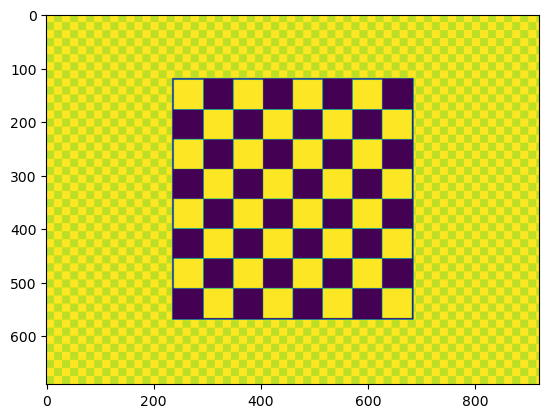

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('content/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png',0)
plt.imshow(img)



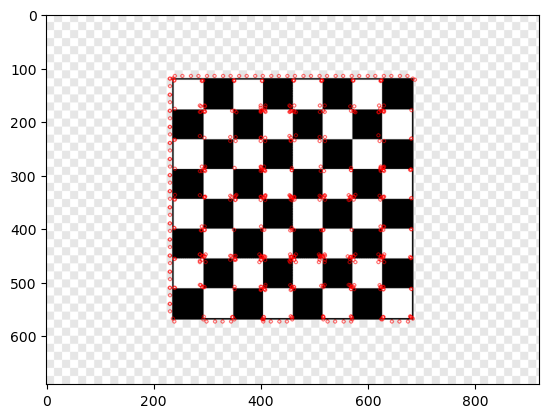

(<matplotlib.image.AxesImage at 0x15dfc9340>, None)

In [13]:
# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, outImage = None, color=(255,0,0))

plt.imshow(img2),plt.show()